In [47]:
import ROOT,os,glob,math
from array import array
import numpy as np

In [48]:
hist="Zee_mc_sherpaZ_SR_highZPt100_LeadFatJ_ZXmass"
pathbkg="/global/homes/w/wding/zplusx_swifit/eos/syst/bkgsyst.root"
pathdata="/global/homes/w/wding/zplusx_swifit/eos/syst/SR.root"
fdata=ROOT.TFile(pathdata,"r")
for i in fdata.GetListOfKeys():
    hists.append(i.GetName())
hist=[int(args.path)]
h2=fdata.Get(hist)
f=ROOT.TFile(pathbkg,"r")
h1=f.Get(hist)
s1=f.Get(hist+"_syst1")
s2=f.Get(hist+"_syst2")
Zem=hist.split("_")[0]
channel=hist.split("_")[-2]
Mass=hist.split("_")[-1]

IndentationError: expected an indented block (<ipython-input-48-4159353f7ebd>, line 6)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file figures/Zee_mc_sherpaZ_SR_highZPt100_LeadFatJ_ZXmass.pdf has been created
Info in <TCanvas::Print>: jpg file figures/Zee_mc_sherpaZ_SR_highZPt100_LeadFatJ_ZXmass.jpg has been created


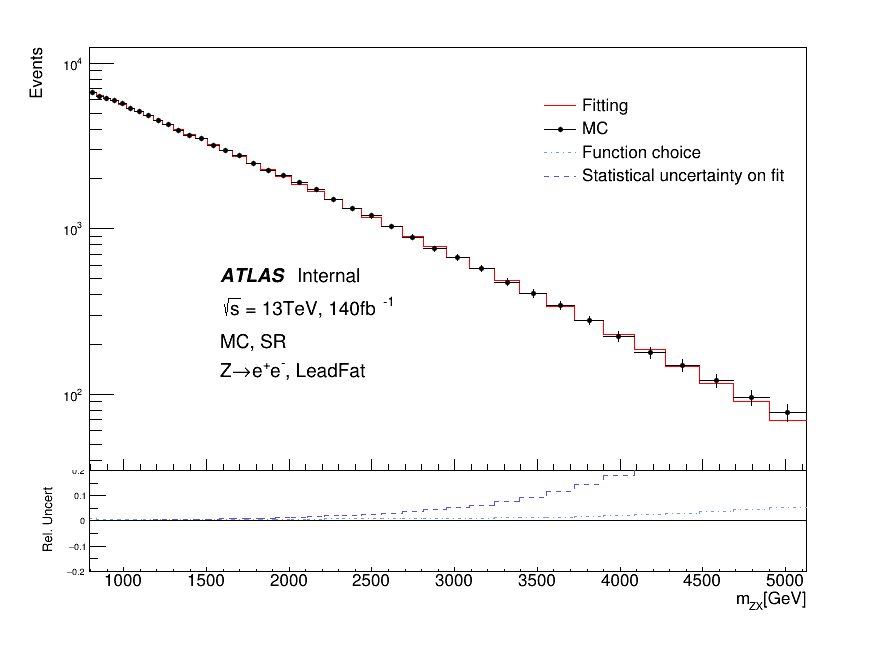

In [46]:
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit();
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0) 
pad1.Draw()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0) 
pad2.SetBottomMargin(0.4)
pad2.Draw()

if Mass=="ZXmass":
    if channel=="LeadB":
        Low=474
        High=5095
    elif channel=="LeadJ":
        Low=570
        High=5095
    else:
        Low=793
        High=5126
else:
    if channel=="LeadB":
        Low=496
        High=5013
    elif channel=="LeadJ":
        Low=588
        High=5013
    else:
        Low=759
        High=5050
pad1.cd()
pad1.SetLogy()
h1.SetNameTitle("","")
h1.GetYaxis().SetTitle("Events")
h1.GetXaxis().SetRangeUser(Low,High)
h2.GetXaxis().SetRangeUser(Low,High)
h1.GetYaxis().SetTitle("Events")
h1.GetYaxis().SetTitleSize(18)
h1.SetLineColor(2)
h1.GetYaxis().SetTitle("Events")
h1.Draw("][ hist")
h2.SetMarkerSize(0.7)
h2.SetMarkerStyle(20)
h2.SetLineColor(1)
for i in range(h2.GetNbinsX()+1):
    if h2.GetBinContent(i) > 0 and h1.GetBinContent(i) > 0 :
        sigma=math.sqrt(h2.GetBinContent(i))
        h2.SetBinError(i,sigma)
        Legend=h2.GetBinContent(i)
    else :
        h2.SetBinError(i, 0 )
h2.Draw("SAME")
t=ROOT.TLegend(0.6,0.6,0.8,0.8)
t.AddEntry(h1,"Fitting","l")
t.AddEntry(h2,"MC","lp")
t.AddEntry(s1,"Function choice","l");
t.AddEntry(s2,"Statistical uncertainty on fit","l");
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()

l=ROOT.TLatex()
l.SetTextSize(0.045)
l.SetTextAlign(13)
LegendLow=Low*2
LegendBottom=Legend*50
l.DrawLatex(LegendLow,LegendBottom*0.15,"#it{ATLAS} #bf{Internal}")
l.DrawLatex(LegendLow,LegendBottom*0.1,"#bf{#sqrt{s} = 13TeV, 140fb^{-1}}")
l.DrawLatex(LegendLow,LegendBottom*0.06,"#bf{MC, SR}")
if Zem=="Zee":
    if channel=="LeadB":
        l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadB}")
    elif channel=="LeadJ":
        l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadJ}")
    else:
        l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadFat}")
else:
    if channel=="LeadB":
        l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadB}")
    elif channel=="LeadJ":
        l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadJ}")
    else:
        l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadFat}")
pad2.cd()
s1.SetNameTitle("","")
s1.GetYaxis().SetRangeUser(-0.2,0.2)
s1.GetYaxis().SetTitle("Rel. Uncert")
s1.GetYaxis().CenterTitle()
s1.GetYaxis().SetTitleFont(43)
s1.GetYaxis().SetTitleSize(14)
s1.GetYaxis().SetLabelFont(43)
s1.GetYaxis().SetLabelSize(10)
s1.GetYaxis().SetNdivisions(407)
if Mass=="ZXmass":
    s1.GetXaxis().SetTitle("m_{ZX}[GeV]")
else:
    s1.GetXaxis().SetTitle("m_{X}[GeV]")
s1.GetXaxis().SetTitleFont(43)
s1.GetXaxis().SetTitleSize(18)
s1.GetXaxis().SetLabelFont(43)
s1.GetXaxis().SetLabelSize(18)
s1.GetXaxis().SetTitleOffset(4)
s1.SetStats(0)

s1.SetLineStyle(4)
s2.SetLineStyle(7)
s1.SetLineColor(38)
s2.SetLineColor(9)
s1.Draw("][ hist")
s2.Draw("SAME")

axis = ROOT.TLine(Low, 0,High , 0) #, 2000, 8000, 100, "")
axis.Draw()
c1.Draw()
name=hist
c1.SaveAs("figures/"+name+".pdf")
c1.SaveAs("figures/"+name+".jpg")

In [7]:
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
ROOT.gStyle.SetOptStat(0)
ROOT.gPad.SetLeftMargin(0.12)
ROOT.gPad.SetBottomMargin(0.12)

pad1=ROOT.TPad("pad1","pad1 ", 0, 0.30, 1, 1)
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.12);
pad1.SetLogy(1)
pad1.Draw()
pad2=ROOT.TPad("pad2","pad2", 0, 0.01, 1, 0.30);
pad2.SetTopMargin(0.00001)
pad2.SetBottomMargin(0.4)
pad2.SetLeftMargin(0.12)
pad2.SetLogy(0)
pad2->Draw()

pad1.cd()
formatHist(h1, "Events");
h2.SetLineColor(kRed);
h2.GetYaxis().SetTitleOffset(0.8)
h1.GetYaxis().SetTitleOffset(0.8)
h1.GetXaxis().SetRangeUser(1100, 8055)
h2.GetXaxis().SetRangeUser(1100, 8055)
h2.Draw("][ hist")
h1.Draw("e1 same")


SyntaxError: invalid syntax (<ipython-input-7-7dc340c3eee4>, line 16)